Epoch 0, Train Loss: 0.5827, Train Accuracy: 0.3250, Val Loss: 0.5894, Val Accuracy: 0.3667
Epoch 5, Train Loss: 0.5096, Train Accuracy: 0.5000, Val Loss: 0.5148, Val Accuracy: 0.5000
Epoch 10, Train Loss: 0.4170, Train Accuracy: 0.3500, Val Loss: 0.4141, Val Accuracy: 0.3333
Epoch 15, Train Loss: 0.3228, Train Accuracy: 0.3250, Val Loss: 0.3228, Val Accuracy: 0.3333
Epoch 20, Train Loss: 0.1896, Train Accuracy: 0.6833, Val Loss: 0.1855, Val Accuracy: 0.6333
Epoch 25, Train Loss: 0.1685, Train Accuracy: 0.7250, Val Loss: 0.1635, Val Accuracy: 0.7333
Epoch 30, Train Loss: 0.1565, Train Accuracy: 0.7667, Val Loss: 0.1514, Val Accuracy: 0.8333
Epoch 35, Train Loss: 0.1458, Train Accuracy: 0.7667, Val Loss: 0.1405, Val Accuracy: 0.8333
Epoch 40, Train Loss: 0.1368, Train Accuracy: 0.7750, Val Loss: 0.1313, Val Accuracy: 0.8333
Epoch 45, Train Loss: 0.1296, Train Accuracy: 0.7833, Val Loss: 0.1238, Val Accuracy: 0.8333
Epoch 50, Train Loss: 0.1238, Train Accuracy: 0.7833, Val Loss: 0.1179, 

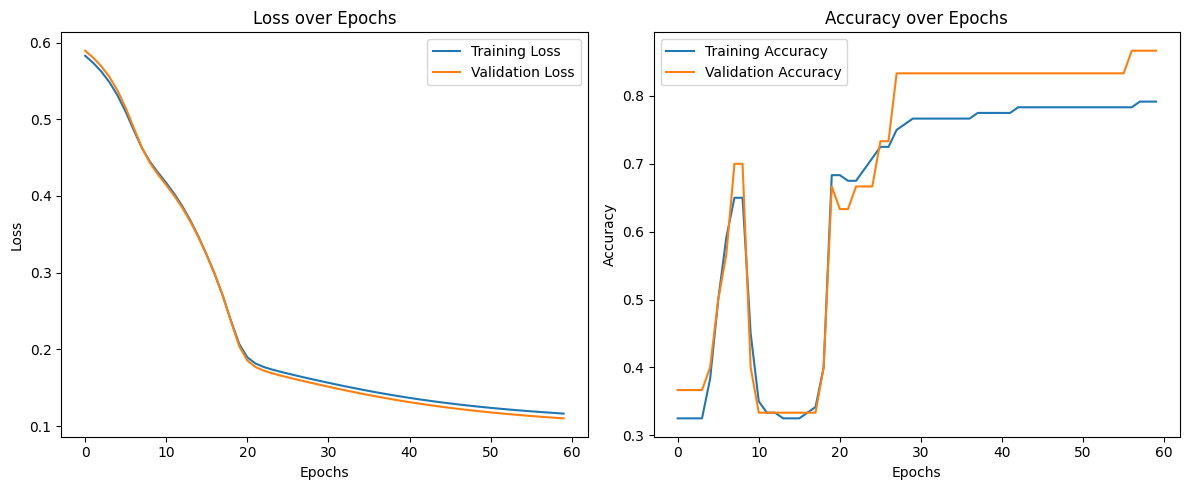

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def one_hot_encoding(y, num_classes):
    return np.eye(num_classes)[y]

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.bias_output = np.random.rand(1, output_size)

    def feedforward(self, X):
        self.hidden_layer_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_activation)
        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_activation)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        output = self.feedforward(X)
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)
        hidden_layer_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(self.hidden_layer_output)
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_delta) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_layer_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate):
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            self.backpropagation(X_train, y_train, learning_rate)
            train_output = self.feedforward(X_train)
            train_loss = np.mean(np.square(y_train - train_output))
            train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
            val_output = self.feedforward(X_val)
            val_loss = np.mean(np.square(y_val - val_output))
            val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)

            if epoch % 5 == 0:
                print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
                      f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        output = self.feedforward(X)
        return np.argmax(output, axis=1)

iris = load_iris()
X = iris.data
y = iris.target
y_one_hot = one_hot_encoding(y, 3)
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_one_hot.shape[1]

nn = NeuralNetwork(input_size, hidden_size, output_size)
epochs = 60
learning_rate = 0.01
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs, learning_rate)
y_val_pred = nn.predict(X_val)
y_val_actual = np.argmax(y_val, axis=1)
accuracy = accuracy_score(y_val_actual, y_val_pred)
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label="Training Loss")
plt.plot(range(epochs), val_losses, label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label="Training Accuracy")
plt.plot(range(epochs), val_accuracies, label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
